In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [105]:
df=pd.read_csv("data.txt",header=None,names=['population','profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


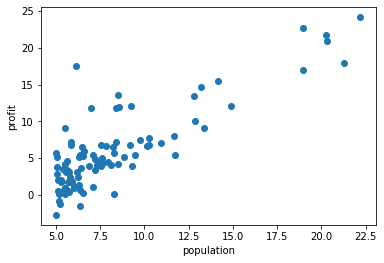

In [106]:
plt.scatter(df['population'],df['profit'])
plt.xlabel("population")
plt.ylabel("profit")
plt.show()

In [107]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

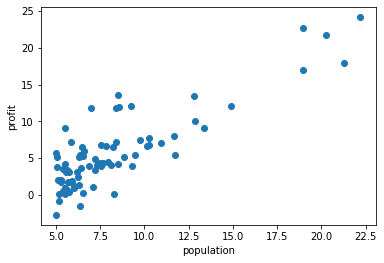

In [108]:
plt.scatter(train['population'],train['profit'])
plt.xlabel("population")
plt.ylabel("profit")
plt.show()

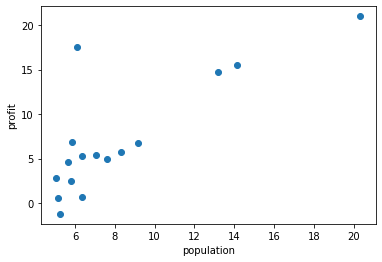

In [109]:
plt.scatter(test['population'],test['profit'])
plt.xlabel("population")
plt.ylabel("profit")
plt.show()

In [172]:
m=train.shape[0]
X=train['population']
y=train['profit']
theta=[0,0] 
h=theta[1]*X+theta[0]
epochs=1000
alpha=0.01

In [173]:
def costfunction(theta,m,X,y):
    h=theta[1]*X+theta[0]
    return (1/(2*m)*np.sum(h-y)**2)
costfunction(theta,m,X,y)

1264.8869511590024

In [176]:
def gradient_descent(theta,m,X,y,alpha,epochs): 
    for i in range(epochs):
        h = theta[1]*X + theta[0]  
        temp1 = (-2/m) * sum(X * (y - h)) 
        temp0 = (-2/m) * sum(y - h)
        theta[1] = theta[1] - alpha * temp1  
        theta[0] = theta[0] - alpha * temp0
        return theta[0],theta[1]
theta[0],theta[1]=gradient_descent(theta,m,X,y,alpha,epochs)        

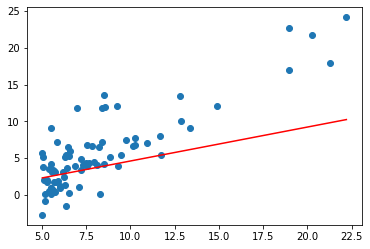

In [177]:
h = theta[1]*X + theta[0]
plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(h), max(h)], color='red')
plt.show()

In [162]:
m=test.shape[0]
X=test['population']
y=test['profit']
theta=[0,0] 
h=theta[1]*X+theta[0]
epochs=1000
alpha=0.01

In [163]:
costfunction(theta,m,X,y)

404.1635814495125

In [164]:
gradient_descent(theta,m,X,y,alpha,epochs)

[0.142155475, 1.578388209905]

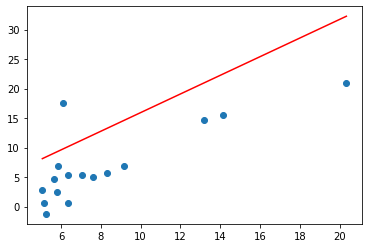

In [165]:
h = theta[1]*X + theta[0]
plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(h), max(h)], color='red')
plt.show()

In [179]:
from sklearn import linear_model
regr=linear_model.LinearRegression(normalize=True)
train_x=np.asanyarray(train[['population']])
train_y=np.asanyarray(train[['profit']])
regr.fit(train_x,train_y) #training the model using training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [180]:
print ("Coefficients are:",regr.coef_,regr.intercept_)

Coefficients are: [[1.183524]] [-4.05680238]


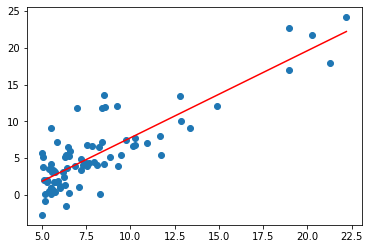

In [182]:
h = regr.coef_*train_x + regr.intercept_
plt.scatter(train_x, train_y) 
plt.plot([min(train_x), max(train_x)], [min(h), max(h)], color='red')
plt.show()

In [184]:
test_x=np.asanyarray(test[['population']])
test_y=np.asanyarray(test[['profit']])
test_y_=regr.predict(test_x) #predicting for test data

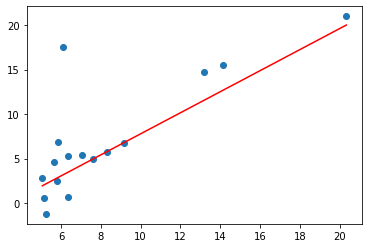

In [185]:
h = regr.coef_*test_x + regr.intercept_
plt.scatter(test_x, test_y) 
plt.plot([min(test_x), max(test_x)], [min(h), max(h)], color='red')
plt.show()